In [40]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [41]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [42]:
data = pd.read_csv('breast-cancer.csv')
data.tail()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [43]:
data_index = [ 'Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
data.columns = data_index
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [44]:
data[data.isnull().any(axis = 1)]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


In [45]:
CleanData = data.copy()
CleanData['node-caps']= (CleanData['node-caps']=='yes').astype(int)
CleanData['irradiat']= (CleanData['irradiat']=='yes').astype(int)
CleanData['Class']= (CleanData['Class']=='recurrence-events').astype(int)

CleanData.head()

quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
CleanData = CleanData.replace({'breast-quad': quad})
CleanData['breast-quad'] = CleanData['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')
CleanData[CleanData.isnull().any(axis = 1)]
CleanData = CleanData.dropna()
CleanData.head()


breast = {'left':1, 'right':2} 
CleanData['breast'] = CleanData['breast'].map(breast)
CleanData.head()

menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
CleanData['menopause'] = CleanData['menopause'].map(menopause)
CleanData.head()


nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
CleanData['inv-nodes'] = CleanData['inv-nodes'].map(nodes)
(CleanData['inv-nodes'].describe)


#Convert age to the numerical average of its average range.
age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
CleanData['age'] = CleanData['age'].map(age)
CleanData.head()


Tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
CleanData['tumor-size'] = CleanData['tumor-size'].map(Tumor)
CleanData.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,1,32,1,0,3,1,2.0,0
1,0,44.5,1,22,1,0,2,2,3.0,0
2,0,44.5,1,22,1,0,2,1,2.0,0
3,0,64.5,2,17,1,0,2,2,1.0,0
4,0,44.5,1,2,1,0,2,2,4.0,0


Class
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

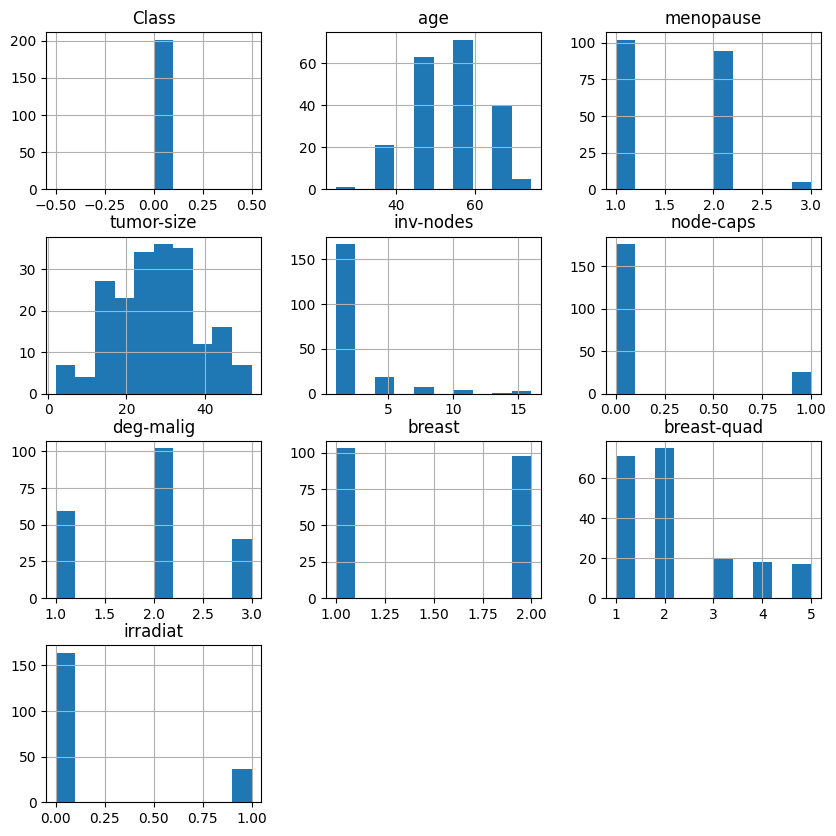

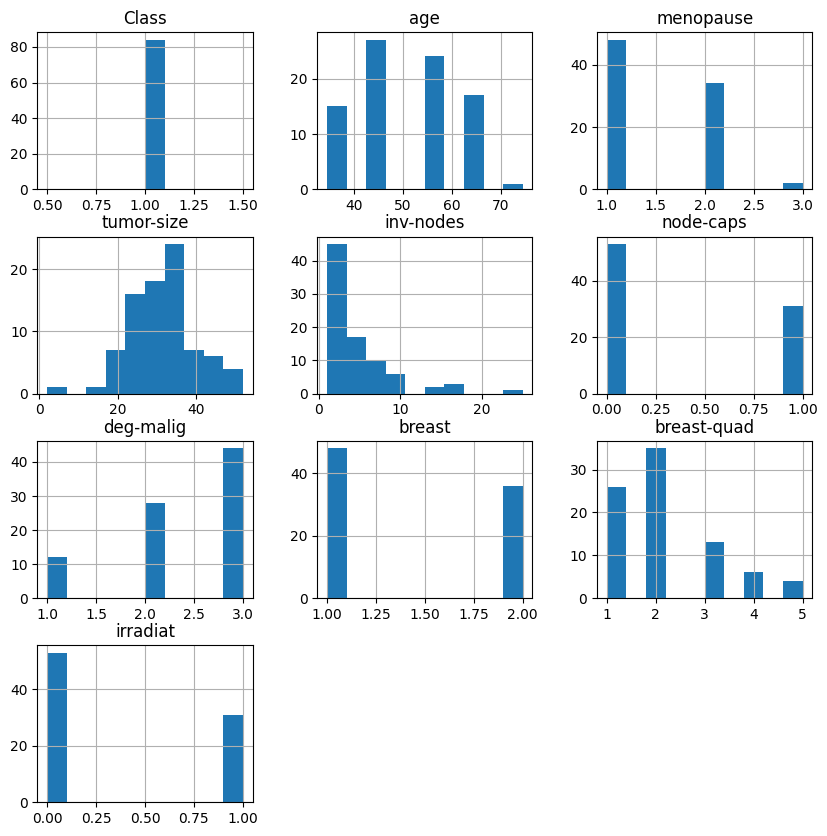

In [46]:
CleanData.groupby('Class').hist(figsize=(10, 10))

In [47]:
Output=CleanData['Class']


In [48]:
Output.dtype



dtype('int32')

In [49]:
features_list = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig']


In [50]:
features = CleanData[features_list]


In [51]:
features.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig
0,34.5,1,32,1,0,3
1,44.5,1,22,1,0,2
2,44.5,1,22,1,0,2
3,64.5,2,17,1,0,2
4,44.5,1,2,1,0,2


In [52]:
Output.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [53]:
features_train, features_test, Output_train, Output_test = train_test_split(features, Output, test_size = 0.33, random_state = 42)


In [54]:
print("Number instances in features_train dataset: ", features_train.shape)
print("Number instances in Output_train dataset: ", Output_train.shape)
print("Number instances in features_test dataset: ", features_test.shape)
print("Number instances in Output_test dataset: ", Output_test.shape)

Number instances in features_train dataset:  (190, 6)
Number instances in Output_train dataset:  (190,)
Number instances in features_test dataset:  (95, 6)
Number instances in Output_test dataset:  (95,)


In [55]:
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(Output_train==1)))
print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(Output_train==0)))

Before OverSampling, counts of Recurrent Class '1': 54
Before OverSampling, counts of No-Recurrent Class '0': 136 



In [56]:
sm = SMOTE(random_state=2)
features_train_res, Output_train_res = sm.fit_resample(features_train, Output_train)


In [57]:
print('After OverSampling, the shape of features_X: {}'.format(features_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(Output_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(Output_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(Output_train_res==0)))

After OverSampling, the shape of features_X: (272, 6)
After OverSampling, the shape of Output_y: (272,) 

After OverSampling, counts of Recurrent Class '1': 136
After OverSampling, counts of Non-Recurrent Class '0': 136


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train,Output_train)
prediction=knn.predict(features_test)
print(" {} nn score: {}".format(6,knn.score(features_test,Output_test)))

 6 nn score: 0.6105263157894737


In [59]:
score_list=[]
for each in range (1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(features_train,Output_train)
    score_list.append(knn2.score(features_test,Output_test))

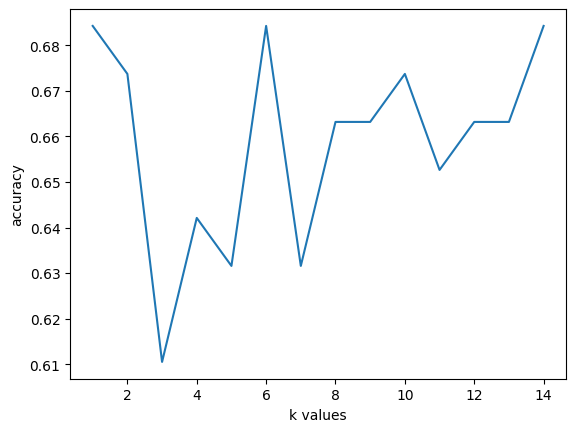

In [60]:
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 16))}  
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(features_train, Output_train)
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

En iyi parametreler: {'n_neighbors': 14}


In [62]:
prediction = grid_search.predict(features_test)
print("En iyi modelin test doğruluğu:", grid_search.score(features_test, Output_test))

En iyi modelin test doğruluğu: 0.6842105263157895


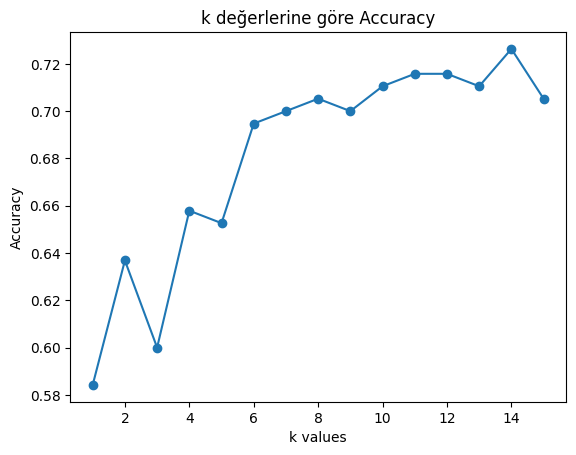

In [63]:
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("k değerlerine göre Accuracy")
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(features_train, Output_train)
predictions = dt.predict(features_test)
accuracy = dt.score(features_test, Output_test)
print("Decision Tree score: {}".format(accuracy))

Decision Tree score: 0.7578947368421053


In [65]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(features_train, Output_train)
predictions = log_reg.predict(features_test)
accuracy = log_reg.score(features_test, Output_test)
print("Logistic Regression score: {}".format(accuracy))

Logistic Regression score: 0.7157894736842105


In [66]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(features_train, Output_train)
predictions = svm_classifier.predict(features_test)
accuracy = svm_classifier.score(features_test, Output_test)
print("SVM score: {}".format(accuracy))

SVM score: 0.6842105263157895


In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features_train, Output_train)
predictions = gnb.predict(features_test)
accuracy = gnb.score(features_test, Output_test)
print("Gaussian Naive Bayes score: {}".format(accuracy))

Gaussian Naive Bayes score: 0.7368421052631579


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(features_train, Output_train)
predictions = rf_classifier.predict(features_test)
accuracy = rf_classifier.score(features_test, Output_test)
print("Random Forest score: {}".format(accuracy))

Random Forest score: 0.7578947368421053


In [69]:
from sklearn.tree import DecisionTreeClassifier
recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)
recurrence_classifier.fit(features_train_res, Output_train_res)

DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)

In [70]:
ModelPredictions = recurrence_classifier.predict(features_test)

In [71]:
ModelPredictions[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [72]:
Output_test.head(10)

9      0
250    1
157    0
210    1
75     0
233    1
265    1
170    0
42     0
226    1
Name: Class, dtype: int32

In [73]:
accuracy_score(y_true = Output_test, y_pred = ModelPredictions)
confusion_matrix(y_true = Output_test, y_pred = ModelPredictions)
print(classification_report(y_true = Output_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        65
           1       0.65      0.37      0.47        30

    accuracy                           0.74        95
   macro avg       0.70      0.64      0.65        95
weighted avg       0.72      0.74      0.71        95



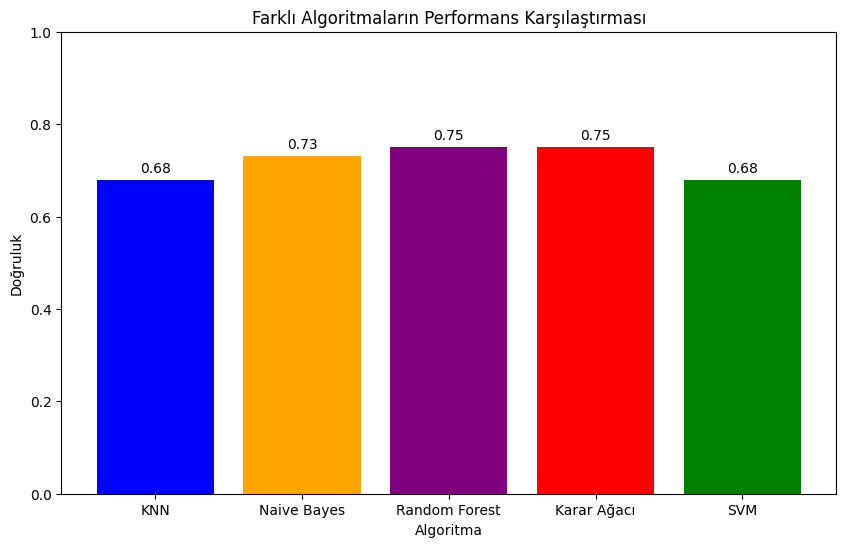

In [74]:
import matplotlib.pyplot as plt

# Doğruluk skorları
knn_accuracy = 0.68
bayes_accuracy = 0.73
random_forest_accuracy = 0.75
decision_tree_accuracy = 0.75
svm_accuracy = 0.68

# Algoritma adları ve doğruluk skorlarını bir tabloya dökme
methods = ['KNN', 'Naive Bayes', 'Random Forest', 'Karar Ağacı', 'SVM']
accuracies = [knn_accuracy, bayes_accuracy, random_forest_accuracy, decision_tree_accuracy, svm_accuracy]

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'purple', 'red', 'green']
bars = plt.bar(methods, accuracies, color=colors)

# Çubukların üzerine doğruluk değerlerini yazma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Grafik başlığı ve eksen etiketleri ekleme
plt.title('Farklı Algoritmaların Performans Karşılaştırması')
plt.xlabel('Algoritma')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)

# Grafiği gösterme
plt.show()